In [3]:
!pip install statsbombpy

# Import libraries
import pandas as pd
from statsbombpy import sb
import matplotlib.pyplot as plt

In [4]:
# This command shows us all the competitions and seasons available in StatsBomb's free data
# It's like looking at a catalog to see what data we can get.
# After running this, find the row for 'Premier League' and the most recent season_name, then note its 'season_id'.
sb.competitions()

C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906


In [5]:
# First, get the full table of competitions into a variable named 'competitions'
competitions = sb.competitions()

# Now, filter this table to find only the rows where the 'competition_name' column is exactly 'Premier League'
premier_league_seasons = competitions[competitions['competition_name'] == 'Premier League']

# Finally, print the resulting filtered table
print(premier_league_seasons)

    competition_id  season_id country_name competition_name  \
64               2         27      England   Premier League   
65               2         44      England   Premier League   

   competition_gender  competition_youth  competition_international  \
64               male              False                      False   
65               male              False                      False   

   season_name               match_updated        match_updated_360  \
64   2015/2016  2025-04-23T14:36:29.347042  2021-06-13T16:17:31.694   
65   2003/2004  2025-06-24T13:53:07.585114  2021-06-13T16:17:31.694   

   match_available_360             match_available  
64                None  2025-04-23T14:36:29.347042  
65                None  2025-06-24T13:53:07.585114  


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [6]:
# --- Step 1: Define the competition and season we want ---
# Premier League is competition_id = 2
# We confirmed that the 2015/2016 season is season_id = 27
COMPETITION_ID = 2
SEASON_ID = 27

In [7]:
# --- Step 2: Get all matches from that season ---
matches = sb.matches(competition_id=COMPETITION_ID, season_id=SEASON_ID)

C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [8]:
# --- Step 3: Filter for Liverpool's matches ---
team_name = "Liverpool"
liverpool_matches = matches[(matches['home_team'] == team_name) | (matches['away_team'] == team_name)]

In [9]:
# --- Step 4: Extract the match IDs into a list ---
match_ids = liverpool_matches['match_id'].tolist()

In [12]:
# Print all the column names of the liverpool_matches DataFrame
print(liverpool_matches.columns)

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')


In [13]:
# --- Step 5: Verify our result ---
print(f"Successfully found {len(match_ids)} matches for {team_name} in the {liverpool_matches.iloc[0]['season']} season.")
print("The first 5 match IDs are:", match_ids[:5])

Successfully found 38 matches for Liverpool in the 2015/2016 season.
The first 5 match IDs are: [3754042, 3754055, 3754226, 3754255, 3753984]


In [14]:
# Create an empty list to store shot events from all matches
coutinho_shots_list = []

In [15]:
# The player we want to analyze. 
# IMPORTANT: The name must be an exact match to what's in the data.
player_name = "Philippe Coutinho Correia"

In [16]:
# Loop through each match ID from our list
for match_id in match_ids:
    # Print progress so we know the code is running
    print(f"Processing match_id: {match_id}")
    
    # Get the event data for the current match
    # This is where the main download happens for each match
    events = sb.events(match_id=match_id)
    
    # Filter for shot events ('type' == 'Shot') by our target player ('player' == player_name)
    player_shots = events[(events['type'] == 'Shot') & (events['player'] == player_name)].copy()
    
    # Add the shots DataFrame from this match to our list
    coutinho_shots_list.append(player_shots)

Processing match_id: 3754042


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754055


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754226


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754255


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3753984


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754040


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754060


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754047


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754051


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754098


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754143


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754198


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754212


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754208


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754230


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754351


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754343


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754003


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3753985


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754129


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754064


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3753986


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3753991


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754018


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754087


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754154


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754214


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754216


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754220


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754251


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754275


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754294


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754305


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754316


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754342


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754345


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754348


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Processing match_id: 3754020


C:\Users\ROG\anaconda3\envs\football_analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [17]:
# After the loop, concatenate all the small DataFrames in the list into one big DataFrame
coutinho_df = pd.concat(coutinho_shots_list, ignore_index=True)

In [18]:
# --- Verification Step ---
print(f"\nFinished processing. Found a total of {len(coutinho_df)} shots for {player_name} in the season.")


Finished processing. Found a total of 111 shots for Philippe Coutinho Correia in the season.


In [19]:
# Display the first 5 rows of our final DataFrame
coutinho_df.head()

,50_50,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,goalkeeper_punched_out,pass_miscommunication,bad_behaviour_card,foul_committed_penalty,clearance_other,foul_won_penalty,goalkeeper_shot_saved_off_target,shot_saved_off_target,goalkeeper_success_in_play,shot_follows_dribble
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# --- Data Preparation for Plotting (Optimized Version) ---

# Split the 'location' column into two new columns
coutinho_df[['x', 'y']] = pd.DataFrame(coutinho_df['location'].tolist(), index=coutinho_df.index)

# Create a clean, de-fragmented copy of the DataFrame to resolve the warning
coutinho_df = coutinho_df.copy()

print("Data prepared for plotting. 'x' and 'y' columns have been added and a clean copy is created.")
coutinho_df.head()

Data prepared for plotting. 'x' and 'y' columns have been added and a clean copy is created.


,50_50,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,bad_behaviour_card,foul_committed_penalty,clearance_other,foul_won_penalty,goalkeeper_shot_saved_off_target,shot_saved_off_target,goalkeeper_success_in_play,shot_follows_dribble,x,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.5,39.6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.2,22.1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.4,38.6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.2,25.8
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.2,44.6


In [26]:
# --- Plotting the Shot Map ---
!pip install mplsoccer
from mplsoccer import VerticalPitch

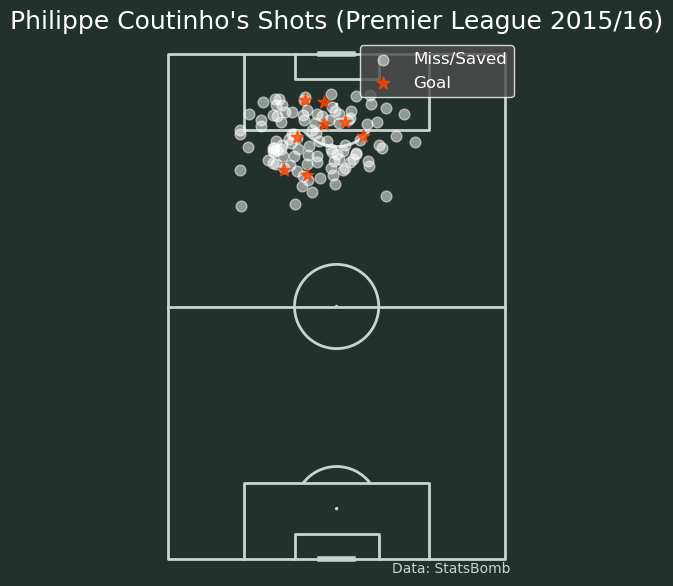

In [57]:
# 1. Create the football pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(8, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b') # Set the background color of the entire figure

# 2. Filter the DataFrame for goals and non-goals
df_goals = coutinho_df[coutinho_df['shot_outcome'] == 'Goal']
df_non_goals = coutinho_df[coutinho_df['shot_outcome'] != 'Goal']

# 3. Plot the non-goal shots
# We plot the non-goals first so the goals will appear on top
pitch.scatter(df_non_goals.x, df_non_goals.y,
              alpha=0.5, s=60, color="#ffffff",
              ax=ax, label='Miss/Saved')

# 4. Plot the goal shots
pitch.scatter(df_goals.x, df_goals.y,
              alpha=0.8, s=90, color="#ff4500",
              ax=ax, label='Goal', marker='*') # Use a star marker for goals

# 5. Add titles and legend
ax.set_title("Philippe Coutinho's Shots (Premier League 2015/16)", color='white', fontsize=18)
legend = ax.legend(loc='upper right', fontsize=12, facecolor='#4d4d4d', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# 6. Add the data source credit to the figure
# (0.97, 0.00) means 97% to the right and 0% from the bottom of the axes.
ax.text(0.97, 0.00, 'Data: StatsBomb',
        transform=ax.transAxes,  # Use axes coordinates
        ha='right',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,
        color='#c7d5cc') # Use the same color as the pitch lines for a subtle look

# Show the plot
plt.show()

In [61]:
# 7. Save the figure to a file
# We will save it inside the 'assets' folder for good organization.
fig.savefig('assets/coutinho_shot_map.png', dpi=300)

In [60]:
# Filter for goals and count the number of rows
num_goals = len(coutinho_df[coutinho_df['shot_outcome'] == 'Goal'])

print(f"Total goals scored by Coutinho: {num_goals}")

Total goals scored by Coutinho: 8


In [52]:
# The precise definition for a shot being inside the penalty box
is_in_box = (coutinho_df['x'] >= 102) & (coutinho_df['y'] >= 18) & (coutinho_df['y'] <= 62)

# Use this precise filter to get the shots inside the box
shots_inside_box_precise = coutinho_df[is_in_box]

# Shots from outside the box are everything that is NOT in the box
# The '~' symbol means NOT
shots_outside_box_precise = coutinho_df[~is_in_box]

print(f"Total shots: {len(coutinho_df)}")
print(f"Shots outside the box (Precise definition): {len(shots_outside_box_precise)}")
print(f"Shots inside the box (Precise definition): {len(shots_inside_box_precise)}")

Total shots: 111
Shots outside the box (Precise definition): 69
Shots inside the box (Precise definition): 42


In [51]:
# Sum up all the xG values from his shots
total_xg = coutinho_df['shot_statsbomb_xg'].sum()

print(f"Total goals scored: {num_goals}")
print(f"Total Expected Goals (xG): {total_xg:.2f}") # .2f keeps two decimal places
print(f"Performance vs xG: {num_goals - total_xg:.2f}")

Total goals scored: 8
Total Expected Goals (xG): 7.13
Performance vs xG: 0.87
